# Choosing the Split

### Introduction

### Remembering Why

Our whole purpose in splitting our data is to mimic the real world scenario.  When training, our model sees the answers, so we hold back some of the data and check different how different versions of the model performs on new data.  Then when choosing hyperparameters we are again doing so by choosing the model that performs best on data -- so we use a validation set to see how it performs on new data.  This is all well and good.  But we need to make one change to our process.

It is important to consider which data to hold back.

Here's one rule: if we have time based data, our most recent data should be in the test dataset.  Let's see why.

### The Most Recent on the Test Set

Let's load up our `imdb_movies` dataset.

In [5]:
import pandas as pd
df = pd.read_csv('./imdb_movies.csv')

In [6]:
df[:2]

,title,genre,budget,runtime,year,month,revenue
0,Avatar,Action,237000000,162.0,2009,12,2787965087
1,Pirates of the Caribbean: At World's End,Adventure,300000000,169.0,2007,5,961000000


Now let's say that we move through `train_test_split` simply with random data.

In [18]:
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=1)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Now let's plot the training data alongside the validation data.

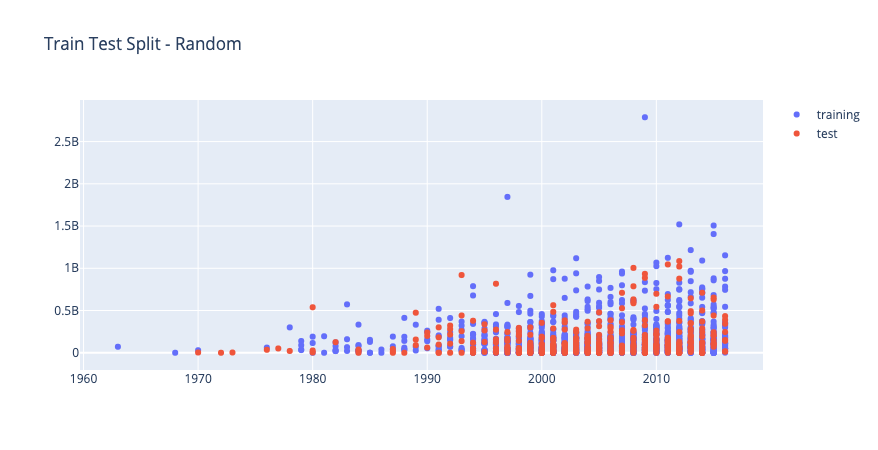

In [46]:
import plotly.graph_objects as go
train_scatter = go.Scatter(x = X_train['year'], y = y_train, mode = 'markers', name = 'training')
test_scatter = go.Scatter(x = X_test['year'], y = y_test, mode = 'markers', name = 'test')
go.Figure(data = [train_scatter, test_scatter], layout = {'title': 'Train Test Split - Random '})

Now think about what this means.  We'll ultimately evaluate our model's performance by how well it predicts the validation dataset in red.  But when our validation includes movies from the 1970s and 1980s, this isn't reflective of the tast it will be given in production.  It will be asked to predict future movies.  

So to come simulate this test, we should separate out our most recent data.

In [36]:
sorted_movies = df.sort_values(['year', 'month'])
sorted_movies[:10]

,title,genre,budget,runtime,year,month,revenue
1108,Pinocchio,Animation,2600000,88.0,1940,2,84300000
862,Lolita,Drama,2000000,153.0,1962,6,9250000
1125,Cleopatra,Drama,31115000,248.0,1963,6,71000000
1066,"Yours, Mine and Ours",Comedy,0,111.0,1968,4,0
1877,Tora! Tora! Tora!,NaN,25485000,144.0,1970,1,29548291
1954,Waterloo,NaN,25000000,128.0,1970,10,3052000
1028,Solaris,Drama,0,167.0,1972,3,0
1243,Mean Streets,Drama,500000,110.0,1973,10,3000000
1403,The Bad News Bears,Comedy,35000000,102.0,1976,4,35323292
1838,The Omen,Horror,2800000,111.0,1976,6,60922980


In [37]:
sorted_movies.shape
# (2000, 7)


(2000, 7)

In [40]:
training_and_validate = sorted_movies[:-100]
test_set = sorted_movies[-100:]

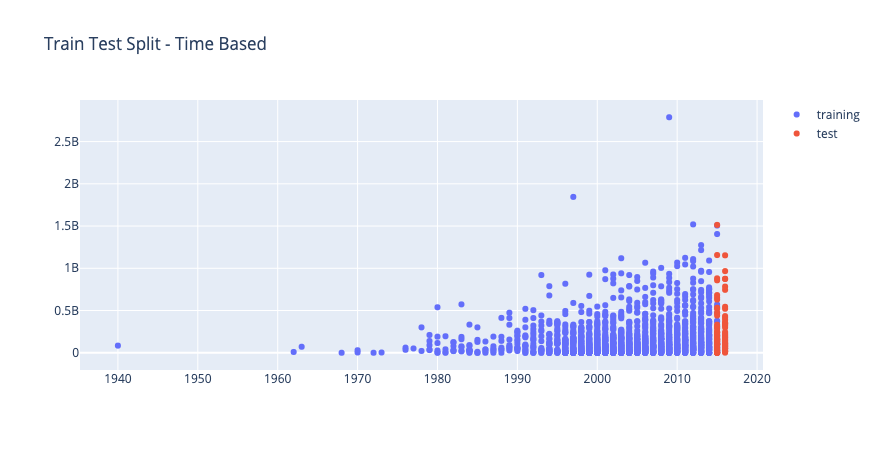

In [44]:
train_scatter = go.Scatter(x = training_and_test['year'], y = training_and_test['revenue'], mode = 'markers', name = 'training')
test_scatter = go.Scatter(x = validation_set['year'], y = validation_set['revenue'], mode = 'markers', name = 'test')
go.Figure(data = [train_scatter, test_scatter], layout = {'title': 'Train Test Split - Time Based '})

So this is the new way that we'll predict our model's performance: by seeing how the model performs on the most recent data.

### Splitting the Validation Set

Our sequential split doesn't just apply to our splitting of our test data, but our validation data as well.  Let's first see the problem with our current approach.

In [47]:
training_and_validate = sorted_movies[:-100]
test_set = sorted_movies[-100:]

So we separated out the test set, and now let's separate the training and validation sets by selecting data at random.

In [50]:
X_train_and_validate = training_and_validate.iloc[:, 2:-1]
y_train_and_validate = training_and_validate.iloc[:, -1]

In [52]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, 
                                                    y_train_and_validate,  
                                                    test_size=0.2, random_state=1)

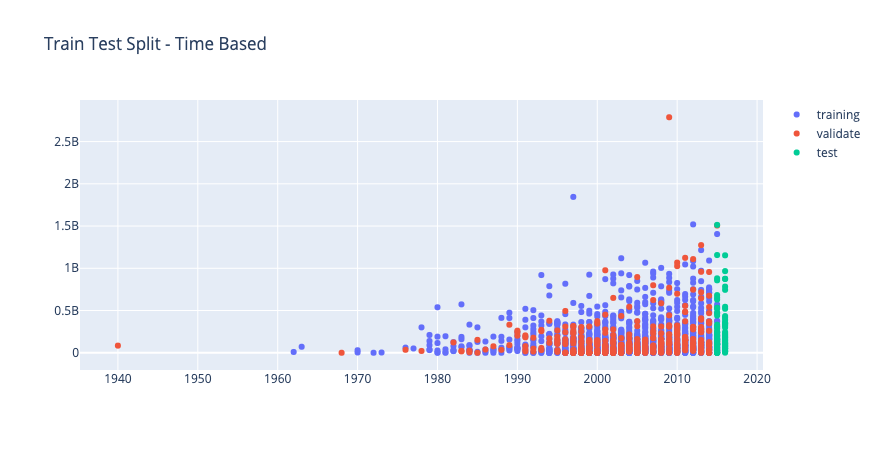

In [56]:
train_scatter = go.Scatter(x = X_train['year'], y = y_train, mode = 'markers', name = 'training')
validate_scatter = go.Scatter(x = X_validate['year'], y = y_validate, mode = 'markers', name = 'validate')
test_scatter = go.Scatter(x = validation_set['year'], y = validation_set['revenue'], mode = 'markers', name = 'test')
go.Figure(data = [train_scatter, validate_scatter, test_scatter], layout = {'title': 'Train Test Split - Time Based '})

Here, we will be choosing our features based on how well they perform on our validation set.  But here, we may be underrating how difficult it is to predict data on years we have not yet seen.  We don't want to choose features that perform well on any data, but who future movies.  So the best way to see that is to once again, split our data sequentially. 

In [57]:
training_set = sorted_movies[:-200]
validate_set = sorted_movies[-200:-100]
test_set = sorted_movies[-100:]

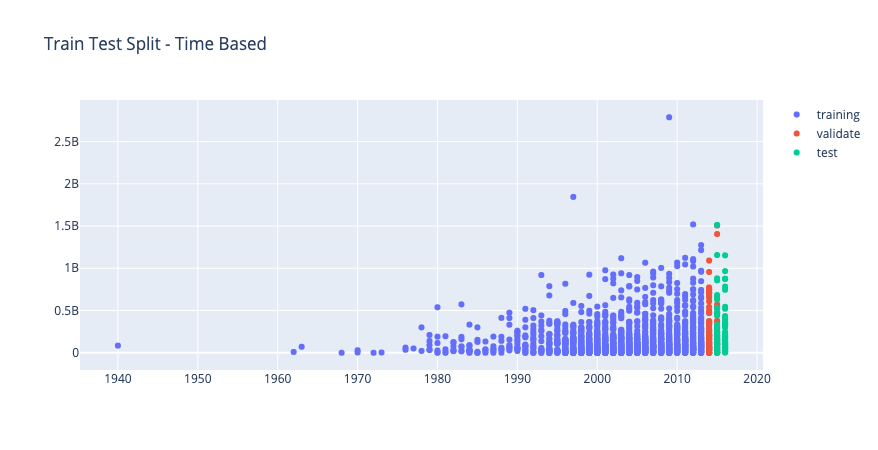

In [59]:
train_scatter = go.Scatter(x = training_set['year'], y = training_set['revenue'], mode = 'markers', name = 'training')
validate_scatter = go.Scatter(x = validate_set['year'], y = validate_set['revenue'], mode = 'markers', name = 'validate')
test_scatter = go.Scatter(x = test_set['year'], y = test_set['revenue'], mode = 'markers', name = 'test')
go.Figure(data = [train_scatter, validate_scatter, test_scatter], layout = {'title': 'Train Test Split - Time Based '})

So now we will train on movies up to 2013, then we will choose the features that best predict 2014 and 2015 movies it has not yet seen, and then evalute the final model's performance on movies from "future" in 2015 and 2016.

To accomplish this train test split we can do so by selecting the data as we did, or we can go back to using our `train_test_split` method.

In [60]:
sorted_movies = df.sort_values(['year', 'month'])

In [64]:
X_sorted = sorted_movies.iloc[:, 2:-1]
y_sorted = sorted_movies.iloc[:, -1]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_validate = train_test_split(X_sorted, y_sorted,  test_size=0.2, shuffle = False)

In [70]:
X_train[:2]

,budget,runtime,year,month
1108,2600000,88.0,1940,2
862,2000000,153.0,1962,6


In [71]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,  test_size=0.2, shuffle = False)

In [72]:
X_train[-1:]

,budget,runtime,year,month
130,150000000,98.0,2008,11


In [75]:
X_validate[-1:]

,budget,runtime,year,month
495,79000000,94.0,2012,1


In [76]:
X_test[-1:]

,budget,runtime,year,month
357,100000000,125.0,2016,8


### Summary

In this lesson, we saw that when there is a datetime component, it is important to segment our data sequentially.  This means having the training data be earlier than the validation data which is earlier than the test data.

Doing this best simulates the circumstances that will occur when we deploy our model in the real world: it will have to predict future data.  This means that we want our test set to be the most recent data we have as our most recent data will likely be most similar to our future data.

And it means that our validation set should be later than our training set, so that we choose hyperparameters that perform well with predicting future data.

To separate our data sequentially we first sort out dataset, and then use either pandas or the `test_train_split` function to create our holdout sets.